**Análise dos Indicadores Educacionais Carioca**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
id_inep=pd.read_csv('id_inep.csv')
id_inep

,ano,id_municipio,localizacao,rede,atu_ei,atu_ei_creche,atu_ei_pre_escola,atu_ef,atu_ef_anos_iniciais,atu_ef_anos_finais,...,ied_em_nivel_3,ied_em_nivel_4,ied_em_nivel_5,ied_em_nivel_6,icg_nivel_1,icg_nivel_2,icg_nivel_3,icg_nivel_4,icg_nivel_5,icg_nivel_6
0,2006,1100015,rural,estadual,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,1100015,rural,municipal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006,1100015,rural,publica,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,1100015,rural,total,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1100015,total,estadual,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008631,2020,5300108,urbana,estadual,20.8,15.1,20.9,24.6,21.7,29.2,...,66.6,18.0,2.6,1.5,1.6,32.2,42.0,8.6,9.6,6.0
1008632,2020,5300108,urbana,federal,NaN,NaN,NaN,29.6,NaN,29.6,...,30.4,35.7,2.0,0.0,0.0,0.0,0.0,44.4,55.6,0.0
1008633,2020,5300108,urbana,privada,14.9,14.2,16.0,21.3,18.5,26.7,...,39.7,41.2,8.3,3.6,30.6,26.4,18.3,23.9,0.4,0.4
1008634,2020,5300108,urbana,publica,20.8,15.1,20.9,24.6,21.7,29.2,...,62.6,19.9,2.5,1.3,1.5,31.7,41.3,9.1,10.3,6.1


In [3]:
#descubro os tipos de localização e redes presentes na tabela

localizacoes=id_inep['localizacao'].unique()
redes=id_inep['rede'].unique()

print(localizacoes)
print(redes)

['rural' 'total' 'urbana' 'publica']
['estadual' 'municipal' 'publica' 'total' 'privada' 'federal' 'rural']


In [4]:
#chequei quando há uma localização publica, mas na verdade houve uma troca 
#entre localização e rede em uma linha, por isso também há uma rede rural

id_teste=id_inep[(id_inep['localizacao']=='publica')]
id_teste

,ano,id_municipio,localizacao,rede,atu_ei,atu_ei_creche,atu_ei_pre_escola,atu_ef,atu_ef_anos_iniciais,atu_ef_anos_finais,...,ied_em_nivel_3,ied_em_nivel_4,ied_em_nivel_5,ied_em_nivel_6,icg_nivel_1,icg_nivel_2,icg_nivel_3,icg_nivel_4,icg_nivel_5,icg_nivel_6
602335,2014,5300108,publica,rural,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#filtro para o município do Rio e a localização total, e seleciono as colunas que vou analisar

id_rio=id_inep[(id_inep['localizacao']=='total') & (id_inep['id_municipio']==3304557)]

colunas=['ano', 'rede', 'tdi_ef', 'taxa_abandono_ef']

id_rio=id_rio[colunas]

id_rio=id_rio.dropna(axis=0)

In [6]:
id_rio.head()

,ano,rede,tdi_ef,taxa_abandono_ef
105273,2007,estadual,55.2,13.3
105274,2007,federal,12.1,0.3
105275,2007,municipal,27.4,2.1
105276,2007,privada,8.0,0.3
105277,2007,publica,28.3,2.6


In [7]:
#crio as tabelas das redes publica e privada

id_rio_pu=id_rio[(id_rio['rede']=='publica')]

id_rio_priv=id_rio[(id_rio['rede']=='privada')]

In [8]:
id_rio_pu

,ano,rede,tdi_ef,taxa_abandono_ef
105277,2007,publica,28.3,2.6
171997,2008,publica,26.5,2.6
238712,2009,publica,25.7,2.7
305349,2010,publica,27.3,2.5
372318,2011,publica,27.9,2.4
439886,2012,publica,27.2,2.0
507551,2013,publica,25.4,1.8
575250,2014,publica,25.6,2.0
642997,2015,publica,25.7,2.1
710850,2016,publica,25.0,2.0


In [9]:
id_rio_priv

,ano,rede,tdi_ef,taxa_abandono_ef
105276,2007,privada,8.0,0.3
171996,2008,privada,7.7,0.3
238711,2009,privada,7.7,0.4
305348,2010,privada,8.0,0.2
372317,2011,privada,7.8,0.2
439885,2012,privada,8.5,0.3
507550,2013,privada,8.5,0.2
575249,2014,privada,8.8,0.2
642996,2015,privada,8.8,0.2
710849,2016,privada,8.8,0.3


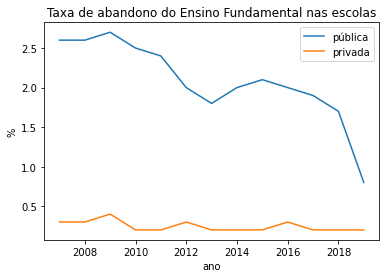

In [10]:
#gráfico de abandono escolar, comparando as escolas públicas e privadas

plt.plot(id_rio_pu['ano'], id_rio_pu['taxa_abandono_ef'], label="pública")

plt.plot(id_rio_priv['ano'], id_rio_priv['taxa_abandono_ef'], label="privada")

plt.title("Taxa de abandono do Ensino Fundamental nas escolas")

plt.xlabel("ano")

plt.ylabel("%")

plt.legend()

plt.show()

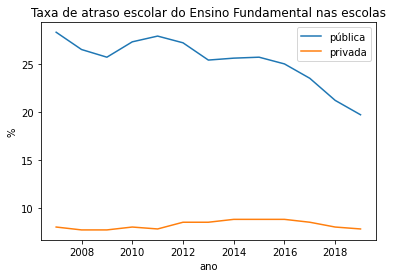

In [11]:
#gráfico de atraso escolar, comparando as escolas públicas e privadas
plt.plot(id_rio_pu['ano'], id_rio_pu['tdi_ef'], label="pública")

plt.plot(id_rio_priv['ano'], id_rio_priv['tdi_ef'], label="privada")

plt.title("Taxa de atraso escolar do Ensino Fundamental nas escolas")

plt.xlabel("ano")

plt.ylabel("%")

plt.legend()

plt.show()